Michael Dasseville

<h1><center>TSIA 2013 Introduction to Deep Learning</center></h1>
<h2><center>MNIST classification using a CNN</center></h2>
<center>Email the complete notebook to attilio.fiandrotti@telecom-paristech.fr</center>

# Installing and importing Keras

In [1]:
# Importing the Keras main module: different backends will have different data ordering:
# theano backend: NCHW
# tensorflow backend: NHWC 
import keras

Using TensorFlow backend.


# Loading and preparing the MNIST dataset
Load the MNIST dataset made available by keras.datasets
Verify the amount of system memory available before and after loading the dataset.

In [2]:
#@title
# The MNSIT dataset is ready to be imported from Keras into RAM
# Warning: you cannot do that for larger databases (e.g., ImageNet)
from keras.datasets import mnist
# START CODE HERE
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# END CODE HERE

Turn train and test labels to one-hot encoding

In [3]:
# Do you remember about one-hot encoding ?
from keras.utils.np_utils import to_categorical
# START CODE HERE
y_train = to_categorical(y_train, num_classes=10, dtype='float32')
y_test = to_categorical(y_test, num_classes=10, dtype='float32')
# END CODE HERE



Reshape the train and test images to the correct 4-dimensional NHWC format using the reshape() method.
Then, normalize the images so that they have zero mean and standard deviation equal to 1 (also approximate solutions are acceptable)

In [4]:
# Reshape to proper images with 1 color channel according to backend scheme
img_rows, img_cols = 28, 28
# START CODE HERE
x_train = x_train.reshape(60000,img_rows, img_cols,1)
x_test = x_test.reshape(10000,img_rows, img_cols,1)
# END CODE HERE

# Now let us normalize the image in the [0-1] range
# START CODE HERE
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# END CODE HERE

# Defining the neural network architecture (i.e., the network model)
Create a LeNet5-like convolutional neural network taking in input the images as matrices of pixels and suitable to classify each image across 10 different classes.
Then, instantiate a SGD optimizer with a tentative LR of 10^-3 and using the appropriate loss function and compile the model.
Calculate the coputational complexity of the convolutional layer(s) and of the first fully connected layer and compare it with that of the previous exercise.

In [6]:
# The Sequential module is sort of a container for more complex NN elements and
# defines a loop-less NN architecture
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D

# The optimizers module provides a number of optimization algorithms for updating
# a netwok parameters accoridng to teh computed error gradints
from keras import optimizers

input_shape = (img_rows, img_cols, 1)

# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (5, 5)
# Number of filters in first convolutional layer
num_kernel_first_conv_layer = 6
# Number of filters in second convolutional layer
num_kernel_second_conv_layer = 16

nb_classes = 10

# START CODE HERE
model = Sequential()
model.add(Convolution2D(input_shape=input_shape, kernel_size=kernel_size,filters=num_kernel_first_conv_layer))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Convolution2D(filters=num_kernel_second_conv_layer, kernel_size=kernel_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Flatten())
model.add(Dense(units=120,input_dim=400))
model.add(Activation('relu'))
model.add(Dense(units=84,input_dim=120))
model.add(Activation('relu'))
model.add(Dense(units=10, input_dim=84))
model.add(Activation('softmax'))
# END CODE HERE

# Defining our SGD optimizer

# START CODE HERE
myop = optimizers.Adam(lr=0.001)             #SGD(lr=0.001)
model.compile(optimizer=myop,loss='categorical_crossentropy', metrics=['accuracy'])
# END CODE HERE

# Let us have a look at the model topology
model.summary()



Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 6)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
activation_2 (Activation)    (None, 8, 8, 16)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flat

# Training the network
Train the model for 10 epochs and over 10k training samples initially only using the fit() method, validating the model at each epoch and keeping track of the training history

In [7]:
# This is where the actual training-testing happens
# Dimension of the batch size (number of images over which error gradients are averaged)
batch_size = 100
# Number of epochs we want to train
epochs = 10
# START CODE HERE
history = model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test)
                    ,epochs=epochs, batch_size=batch_size)
# END CODE HERE

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 124us/step - loss: 1.2404 - acc: 0.8624 - val_loss: 0.1312 - val_acc: 0.9610
Epoch 2/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.1014 - acc: 0.9691 - val_loss: 0.1026 - val_acc: 0.9693
Epoch 3/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0669 - acc: 0.9790 - val_loss: 0.0747 - val_acc: 0.9781
Epoch 4/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.0526 - acc: 0.9831 - val_loss: 0.0703 - val_acc: 0.9789
Epoch 5/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.0444 - acc: 0.9856 - val_loss: 0.0758 - val_acc: 0.9806
Epoch 6/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.0403 - acc: 0.9877 - val_loss: 0.0628 - val_acc: 0.9807
Epoch 7/10
60000/60000 [==============================] - 3s 52us/step - loss: 

# Visualizing the network performance
Visualize the training history using the pyplot package: plot in one graph the train and vaidation loss functions, in another graph the train and validation accuracy

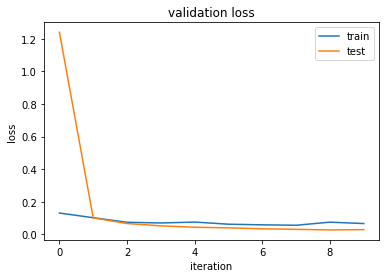

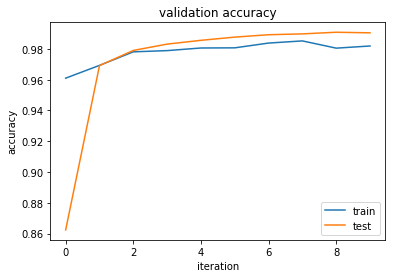

In [9]:
# We now want to plot the train and validation loss functions and accuracy curves
from matplotlib import pyplot as plt


# summarize history for loss
# START CODE HERE
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('validation loss')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train','test'])
# END CODE HERE
plt.show()

# summarize history for accuracy
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.title('validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.legend(['train','test'])
# END CODE HERE
plt.show()


# Experiments

Note down the performance of the trained network in terms of training and validation accuracy as a reference. Then, experiment as follow and compare performance with the reference scenario.

* Experiment with square filters of different size and compare performance with reference scenario.
* Experiment increasing the number of filters in the first and second layer and find the maximum number of filters the network can tolerate before overfitting to the training samples.
* Expeirment with different pooling layers (maxpooling and avgpooling): which one yield the best performance ?
* Modify the network architecture to obtain a twofold reduction of each featuremap without resorting to pooling layers (hint: take insipiration from the ResNet architecture).
* Using the proper metric  from sklearn, check which character is most frequently confused with which: can you explain why ?





In [10]:
# Example of a confusion matrix using sklearn.metrics
from sklearn.metrics import confusion_matrix
predictions = model.predict(x_test)
# Mind that confusion_matrix requires
# START CODE HERE
matrix = confusion_matrix(y_test.argmax(axis=1),
                        predictions.argmax(axis=1))

# END CODE HERE
print (matrix)

[[ 973    1    1    0    0    0    2    2    1    0]
 [   0 1132    1    0    0    1    1    0    0    0]
 [   1    2 1014    1    1    0    0    9    4    0]
 [   0    1    3  980    0   15    0    5    3    3]
 [   1    0    1    0  963    1    4    0    0   12]
 [   1    1    0    0    0  885    4    1    0    0]
 [   2    2    0    0    0    2  950    0    2    0]
 [   0    5    5    0    1    0    0 1012    2    3]
 [  10    1    0    2    2   11    1    8  934    5]
 [   3    4    0    1    7    8    0    3    7  976]]
